Aqui está o texto revisado e aprimorado:

---

# **Projeto SuperComp - Análise de Rede Social e Cliques**

### Introdução

A análise de redes sociais é uma área interdisciplinar que examina as conexões e interações entre indivíduos, grupos ou organizações, buscando compreender melhor a estrutura e a dinâmica de sistemas complexos. Em muitos cenários, identificar grupos altamente conectados, conhecidos como "cliques", é de grande interesse. Esses grupos coesos podem representar comunidades, influenciadores ou subestruturas dentro de uma rede social, compartilhando interesses ou relações próximas.

O problema de encontrar a clique máxima — ou seja, o maior conjunto de nós totalmente interconectados — é fundamental em aplicações de análise de redes. No entanto, sua resolução apresenta uma complexidade computacional exponencial, especialmente em grafos grandes e densos, tornando essa tarefa desafiadora. Neste projeto, exploraremos três abordagens distintas para abordar esse problema, cada uma com suas próprias vantagens e limitações.

Primeiramente, implementaremos uma **abordagem exaustiva**, que encontra a clique máxima explorando todas as combinações possíveis de vértices. Embora esta abordagem forneça resultados precisos, é limitada a grafos de menor escala devido ao alto custo computacional. Em seguida, aplicaremos o **OpenMP** para paralelizar o processo e reduzir o tempo de execução, aproveitando o uso de múltiplas threads. Finalmente, utilizaremos a **biblioteca MPI** (Message Passing Interface) para distribuir o processamento entre diferentes processadores, visando tornar a análise viável para grafos maiores e mais complexos.

**É importante ressaltar que as abordagens com OpenMP e MPI não são paralelizações diretas da heurística exaustiva, mas sim heurísticas alternativas projetadas para maximizar a eficiência no tempo de execução**. Assim, a análise de desempenho considerará o ganho significativo de velocidade alcançado com essas heurísticas, mesmo que isso possa introduzir variações nos resultados. Este ponto será explorado detalhadamente nos resultados, onde discutiremos o equilíbrio entre precisão e eficiência.

Este projeto tem como objetivo comparar essas abordagens, medindo o desempenho e a precisão de cada uma em diferentes tamanhos de grafos. Avaliaremos o tempo de execução, o tamanho da clique máxima identificada e a precisão dos resultados obtidos. Além disso, discutiremos em quais contextos cada abordagem se mostra mais eficaz, destacando os pontos fortes e as limitações de cada técnica no contexto de análise de redes sociais.

## Preparatório para a entrega

1. Gerador de grafo
2. Verificador de cliques máximas de todos os grafos

### Gerador de grafo em python

In [2]:
import networkx as nx
import random

# Parâmetros
num_vertices = 200  # Número de vértices no grafo
probabilidade_conexao = 0.7  # Probabilidade de haver uma aresta entre dois vértices (ajuste conforme necessário)

# Crie um grafo aleatório densamente conectado
grafo = nx.fast_gnp_random_graph(num_vertices, probabilidade_conexao)

# Nome do arquivo de saída
nome_arquivo = "grafo.txt"

# Abra o arquivo para escrita
with open(nome_arquivo, 'w') as arquivo:
    # Escreva a quantidade de vértices e número de arestas na primeira linha
    arquivo.write(f"{num_vertices} {grafo.number_of_edges()}\n")

    # Escreva as arestas no formato de lista de adjacência
    for aresta in grafo.edges():
        arquivo.write(f"{aresta[0]+1} {aresta[1]+1}\n")  # +1 para ajustar os índices (começando em 1)

print(f"Grafo densamente conectado gerado e salvo em '{nome_arquivo}'.")

Grafo densamente conectado gerado e salvo em 'grafo.txt'.


### Verificando os cliques de cada arquivo:

In [2]:
import networkx as nx

# Nome dos arquivos de entrada
nome_arquivo = ["grafos/grafo50.txt", "grafos/grafo75.txt", "grafos/grafo100.txt", "grafos/grafo150.txt"]

for arquivo in nome_arquivo:
    # Abrir o arquivo e pular a primeira linha
    with open(arquivo, 'r') as f:
        next(f)  # Pula a primeira linha

        # Lê o grafo a partir das linhas restantes
        G = nx.parse_adjlist(f)

    # Encontrar todas as cliques maximais
    cliques_maximais = list(nx.find_cliques(G))

    # Encontrar a clique máxima (a maior)
    clique_maxima = max(cliques_maximais, key=len)

    print(f"Arquivo: {arquivo}")
    print("Clique máxima encontrada:", clique_maxima)
    print("Tamanho da clique máxima:", len(clique_maxima))
    print("-" * 40)  # Separador entre os arquivos

Arquivo: grafos/grafo50.txt
Clique máxima encontrada: ['4', '12', '30', '24', '41', '23', '17', '3', '42', '27', '1']
Tamanho da clique máxima: 11
----------------------------------------
Arquivo: grafos/grafo75.txt
Clique máxima encontrada: ['26', '30', '32', '20', '36', '27', '64', '2', '38', '45', '48', '74', '59']
Tamanho da clique máxima: 13
----------------------------------------
Arquivo: grafos/grafo100.txt
Clique máxima encontrada: ['98', '60', '74', '70', '30', '36', '69', '35', '94', '71', '15', '56', '22', '25', '13']
Tamanho da clique máxima: 15
----------------------------------------
Arquivo: grafos/grafo150.txt
Clique máxima encontrada: ['40', '85', '2', '67', '31', '33', '95', '72', '99', '84', '62', '89', '21', '97', '5', '141']
Tamanho da clique máxima: 16
----------------------------------------


## Soluções Implementadas
1. Exaustiva
2. OpenMP
3. MPI

---

### 1. Implementação exaustiva em C++ do problema da clique máxima

``` cpp
#include <iostream>
#include <vector>
#include <algorithm>
#include <chrono>
#include <string>
#include <fstream> // Inclui fstream para uso do ifstream

// Função para ler o grafo a partir do arquivo de entrada
std::vector<std::vector<int>> LerGrafo(const std::string& nomeArquivo, int& numVertices) {
    std::ifstream arquivo(nomeArquivo);
    if (!arquivo.is_open()) {
        std::cerr << "Erro ao abrir o arquivo " << nomeArquivo << std::endl;
        return {};
    }

    int numArestas;
    arquivo >> numVertices >> numArestas;

    // Inicializa a matriz de adjacência com 0s
    std::vector<std::vector<int>> grafo(numVertices, std::vector<int>(numVertices, 0));

    // Lê as arestas e preenche a matriz de adjacência
    for (int i = 0; i < numArestas; ++i) {
        int u, v;
        arquivo >> u >> v;
        grafo[u - 1][v - 1] = 1;
        grafo[v - 1][u - 1] = 1;  // Grafo não direcionado
    }

    arquivo.close();
    return grafo;
}

// Função recursiva para explorar todas as combinações e encontrar a clique máxima
void BuscaCliqueMaxima(const std::vector<std::vector<int>>& grafo, std::vector<int>& atualClique, 
                       std::vector<int>& cliqueMaxima, int numVertices, int vInicial) {
    // Se o clique atual é maior que a maior clique encontrada, atualizamos a clique máxima
    if (atualClique.size() > cliqueMaxima.size()) {
        cliqueMaxima = atualClique;
    }

    for (int v = vInicial; v < numVertices; ++v) {
        bool adjacenteATodos = true;

        // Verifica se o vértice v é adjacente a todos os vértices do clique atual
        for (int u : atualClique) {
            if (grafo[u][v] == 0) { // Se não for adjacente, quebra
                adjacenteATodos = false;
                break;
            }
        }

        if (adjacenteATodos) {
            atualClique.push_back(v); // Adiciona o vértice ao clique atual
            BuscaCliqueMaxima(grafo, atualClique, cliqueMaxima, numVertices, v + 1);
            atualClique.pop_back(); // Retira o vértice para explorar novas combinações
        }
    }
}

// Função principal para encontrar a clique máxima
std::vector<int> EncontrarCliqueMaxima(const std::vector<std::vector<int>>& grafo, int numVertices) {
    std::vector<int> cliqueMaxima;
    std::vector<int> atualClique;
    BuscaCliqueMaxima(grafo, atualClique, cliqueMaxima, numVertices, 0);
    return cliqueMaxima;
}

int main() {
    int numVertices;
    std::string nomeArquivo = "grafo.txt";
    
    // Lê o grafo do arquivo
    std::vector<std::vector<int>> grafo = LerGrafo(nomeArquivo, numVertices);

    auto inicioTotal = std::chrono::high_resolution_clock::now();
    
    // Encontra a clique máxima usando a abordagem exaustiva recursiva
    std::vector<int> cliqueMaxima = EncontrarCliqueMaxima(grafo, numVertices);
    
    auto duracaoTotal = std::chrono::duration_cast<std::chrono::seconds>(
                            std::chrono::high_resolution_clock::now() - inicioTotal).count();

    // Exibe o resultado no terminal
    std::cout << "Clique máxima encontrada: ";
    for (int v : cliqueMaxima) {
        std::cout << v + 1 << " "; // Exibe vértices da clique máxima
    }
    std::cout << std::endl;

    std::cout << "Tempo total de execução: " << duracaoTotal << " segundos" << std::endl;

    return 0;
}

```


### segunda tarefa: Até qual tamanho de problema você conseguiu obter um resultado em tempo hábil (aprox. 15 min)? Você deve apresentar um pseudo-codigo de uma heurística para otimizar essa tarefa exaustiva. É possível implementar alguma poda? Algum critério que evite calcular um nó, dado que você já descobriu uma clique maior?

**Heurística e Poda para Otimização da Busca Exaustiva**

Para melhorar o desempenho da busca exaustiva pela clique máxima, implementamos uma heurística com poda, que reduz a quantidade de combinações a serem exploradas e, assim, acelera o processo.

Primeiro, os vértices do grafo são ordenados com base em seu grau (número de conexões). Exploramos inicialmente os vértices mais conectados, pois eles têm maior probabilidade de formar uma clique grande. Isso direciona a busca para conjuntos mais promissores logo no início, ajudando a identificar uma clique significativa cedo e fornecer um limite para as próximas explorações.

Além disso, aplicamos um critério de poda: se, ao verificar um conjunto parcial, o número de vértices restantes somado ao tamanho do conjunto atual não puder superar o tamanho da maior clique encontrada até o momento, interrompemos a exploração desse caminho. Esse critério reduz significativamente o número de combinações verificadas, uma vez que não desperdiçamos tempo explorando possibilidades que certamente não formarão uma clique maior que a já conhecida.

Por fim, a cada novo vértice adicionado à clique, consideramos apenas os vértices que são adjacentes a todos os vértices da clique atual, restringindo ainda mais os candidatos e acelerando a exploração.

Essas melhorias tornam a abordagem exaustiva mais eficiente, especialmente para grafos de maior complexidade, reduzindo o tempo de execução ao evitar explorações redundantes e irrelevantes.

```pseudo
Função EncontrarCliqueMaximaComPoda(grafo, numVertices)
    cliqueMaxima = ListaVazia()
    candidatos = OrdenarVerticesPorGrau(grafo)  # Ordena vértices pelo grau em ordem decrescente

    Chamar BuscaCliqueMaxima(grafo, ListaVazia, cliqueMaxima, candidatos, 0)
    Retornar cliqueMaxima
Fim Função

Função BuscaCliqueMaxima(grafo, atualClique, cliqueMaxima, candidatos, profundidade)
    Se tamanho de atualClique + tamanho de candidatos <= tamanho de cliqueMaxima Então
        Retornar  # Poda, pois não há como superar a clique máxima conhecida

    Se tamanho de atualClique > tamanho de cliqueMaxima Então
        cliqueMaxima = cópia de atualClique

    Para cada v em candidatos Faça
        novosCandidatos = ListaDeVérticesAdjacentes(v, candidatos)  # Apenas vértices adjacentes a v
        atualClique.adicionar(v)
        
        Chamar BuscaCliqueMaxima(grafo, atualClique, cliqueMaxima, novosCandidatos, profundidade + 1)
        
        atualClique.remover(v)  # Volta para estado anterior
Fim Função

```


---

### 2. Implementação OpenMP em C++ do problema da clique máxima

``` cpp
#include <iostream>
#include <fstream>
#include <sstream>
#include <vector>
#include <algorithm>
#include <omp.h>
#include <chrono>

std::vector<std::vector<int>> carregarGrafo(const std::string &arquivo) {
    std::ifstream inputFile(arquivo);
    std::vector<std::vector<int>> grafo;
    std::string linha;
    while (getline(inputFile, linha)) {
        std::istringstream iss(linha);
        int v1, v2;
        iss >> v1 >> v2;
        while (grafo.size() <= std::max(v1, v2)) {
            grafo.emplace_back();
        }
        grafo[v1].push_back(v2);
        grafo[v2].push_back(v1);
    }
    return grafo;
}

std::vector<int> encontrarCliqueDoNo(int no, const std::vector<std::vector<int>>& grafo) {
    std::vector<int> clique = {no};
    for (int vizinho : grafo[no]) {
        bool fazParteClique = true;
        for (int membro : clique) {
            if (std::find(grafo[membro].begin(), grafo[membro].end(), vizinho) == grafo[membro].end()) {
                fazParteClique = false;
                break;
            }
        }
        if (fazParteClique) {
            clique.push_back(vizinho);
        }
    }
    return clique;
}

std::vector<int> encontrarCliqueMaxima(const std::vector<std::vector<int>> &grafo) {
    std::vector<int> cliqueMaxima;

    #pragma omp parallel
    {
        std::vector<int> cliqueLocal;

        #pragma omp for nowait
        for (int i = 0; i < grafo.size(); ++i) {
            std::vector<int> novaClique = encontrarCliqueDoNo(i, grafo);

            #pragma omp critical
            if (novaClique.size() > cliqueMaxima.size()) {
                cliqueMaxima = novaClique;
            }
        }
    }

    return cliqueMaxima;
}

int main() {
    std::string arquivo = "grafos/grafo150.txt";
    auto grafo = carregarGrafo(arquivo);
    std::vector<int> cliqueMaxima;
    auto start = std::chrono::high_resolution_clock::now();

    #pragma omp parallel
    {
        std::vector<int> cliqueLocal;
        #pragma omp for
        for (int i = 0; i < grafo.size(); ++i) {
            auto clique = encontrarCliqueDoNo(i, grafo);
            #pragma omp critical
            {
                if (clique.size() > cliqueMaxima.size()) {
                    cliqueMaxima = clique;
                }
            }
        }
    }

    auto end = std::chrono::high_resolution_clock::now();
    std::chrono::duration<double> duracao = end - start;

    std::cout << "Clique máxima encontrada: ";
    for (int no : cliqueMaxima) std::cout << no << " ";
    std::cout << "\nTamanho da clique máxima: " << cliqueMaxima.size() << "\n";
    std::cout << "Tempo total de execução: " << duracao.count() << " segundos\n";

    return 0;
}
```


---

### 3. Implementação MPI em C++ do problema da clique máxima

```cpp
#include <mpi.h>
#include <iostream>
#include <fstream>
#include <sstream>
#include <vector>
#include <algorithm>
#include <chrono>

std::vector<std::vector<int>> carregarGrafo(const std::string &arquivo) {
    std::ifstream inputFile(arquivo);
    std::vector<std::vector<int>> grafo;
    std::string linha;
    while (getline(inputFile, linha)) {
        std::istringstream iss(linha);
        int v1, v2;
        iss >> v1 >> v2;
        while (grafo.size() <= std::max(v1, v2)) {
            grafo.emplace_back();
        }
        grafo[v1].push_back(v2);
        grafo[v2].push_back(v1);
    }
    return grafo;
}

std::vector<int> encontrarCliqueDoNo(int no, const std::vector<std::vector<int>> &grafo) {
    std::vector<int> clique = {no};
    for (int vizinho : grafo[no]) {
        bool parteDaClique = true;
        for (int membro : clique) {
            if (std::find(grafo[membro].begin(), grafo[membro].end(), vizinho) == grafo[membro].end()) {
                parteDaClique = false;
                break;
            }
        }
        if (parteDaClique) {
            clique.push_back(vizinho);
        }
    }
    return clique;
}

std::vector<int> encontrarCliqueMaxima(const std::vector<std::vector<int>> &grafo, int rank, int size) {
    std::vector<int> cliqueMaxima;

    for (int i = rank; i < grafo.size(); i += size) {
        std::vector<int> novaClique = encontrarCliqueDoNo(i, grafo);

        if (novaClique.size() > cliqueMaxima.size()) {
            cliqueMaxima = novaClique;
        }
    }

    return cliqueMaxima;
}

int main(int argc, char** argv) {
    MPI_Init(&argc, &argv);

    int rank, size;
    MPI_Comm_rank(MPI_COMM_WORLD, &rank);
    MPI_Comm_size(MPI_COMM_WORLD, &size);

    std::string arquivo = "grafos/grafo150.txt";
    std::vector<std::vector<int>> grafo = carregarGrafo(arquivo);

    std::vector<int> cliqueMaximaLocal;
    int maxCliqueSizeLocal = 0;
    auto start = std::chrono::high_resolution_clock::now();

    int chunkSize = grafo.size() / size;
    int inicio = rank * chunkSize;
    int fim = (rank == size - 1) ? grafo.size() : inicio + chunkSize;

    for (int i = inicio; i < fim; ++i) {
        auto clique = encontrarCliqueDoNo(i, grafo);
        if (clique.size() > cliqueMaximaLocal.size()) {
            cliqueMaximaLocal = clique;
            maxCliqueSizeLocal = clique.size();
        }
    }

    int maxCliqueSizeGlobal;
    MPI_Allreduce(&maxCliqueSizeLocal, &maxCliqueSizeGlobal, 1, MPI_INT, MPI_MAX, MPI_COMM_WORLD);

    std::vector<int> cliqueMaximaGlobal(maxCliqueSizeGlobal, -1);
    if (maxCliqueSizeLocal == maxCliqueSizeGlobal) {
        cliqueMaximaGlobal = cliqueMaximaLocal;
    }

    MPI_Bcast(cliqueMaximaGlobal.data(), maxCliqueSizeGlobal, MPI_INT, 0, MPI_COMM_WORLD);

    if (rank == 0) {
        auto end = std::chrono::high_resolution_clock::now();
        std::chrono::duration<double> duracao = end - start;
        std::cout << "Clique máxima encontrada: ";
        for (int no : cliqueMaximaGlobal) std::cout << no << " ";
        std::cout << "\nTamanho da clique máxima: " << cliqueMaximaGlobal.size() << "\n";
        std::cout << "Tempo total de execução: " << duracao.count() << " segundos\n";
    }

    MPI_Finalize();
    return 0;
}
```


---

## Análise dos resultados

Com o tamanho desse grafo (1000 arestas), a abordagem exaustiva não pode ser executada em tempo hábil. Portanto, vamos diminuir para o grafo, mas rodar 4 grafos diferentes de tamanhos menores. Com isso temos grafos com 50, 75, 100 e 150 arestas. Segue abaixo a análise dos resultados obtidos para cada um dos grafos.


### Tabela de Resultados

| Grafo      | Abordagem     | Clique Máxima Encontrada                  | Tamanho do Clique Máximo | Tempo de Execução (segundos) |
|------------|---------------|-------------------------------------------|---------------------------|------------------------------|
| Grafo 50   | Exaustiva     | 1 3 4 12 17 23 24 27 30 41 42            | 11                        | 0.024446                     |
|            | OpenMP        | 23 1 3 4 12 17 24 27 30 41 42            | 11                        | 0.000700815                  |
|            | MPI           | 23 1 3 4 12 17 24 27 30 41 42            | 11                        | 0.000634245                  |
| Grafo 75   | Exaustiva     | 2 20 26 27 30 32 36 38 45 48 59 64 74    | 13                        | 0.604922                     |
|            | OpenMP        | 6 2 4 11 15 17 19 21 25 42 55            | 11                        | 0.00233178                   |
|            | MPI           | 6 2 4 11 15 17 19 21 25 42 55            | 11                        | 0.00277856                   |
| Grafo 100  | Exaustiva     | 6 14 15 25 36 42 43 51 54 56 67 68 80 83 88 | 15                     | 8.631420                     |
|            | OpenMP        | 6 2 5 14 17 18 53 58 61 64 67 78         | 12                        | 0.00437334                   |
|            | MPI           | 6 2 5 14 17 18 53 58 61 64 67 78         | 12                        | 0.0045673                    |
| Grafo 150  | Exaustiva     | 1 2 6 17 28 36 60 68 73 91 92 94 102 116 131 148 | 16              | 273.956381                   |
|            | OpenMP        | 60 1 2 3 6 8 23 36 63 68 83 85 87 136 148 | 15                     | 0.0146447                    |
|            | MPI           | 60 1 2 3 6 8 23 36 63 68 83 85 87 136 148 | 15                     | 0.0156572                    |

---

### Análise dos Dados e Comparação de Abordagens

1. **Precisão dos Resultados:**
   - A abordagem exaustiva foi capaz de identificar corretamente o clique máximo em todos os grafos, apresentando a resposta completa e correta.
   - As abordagens OpenMP e MPI também encontraram cliques próximos ao máximo, mas, especialmente para grafos maiores, retornaram cliques menores que o exato encontrado pela abordagem exaustiva. Isso indica que o paralelismo usado em OpenMP e MPI pode priorizar heurísticas que otimizam tempo, possivelmente sacrificando precisão completa em grafos complexos.

2. **Desempenho em Tempo de Execução:**
   - A abordagem exaustiva possui um aumento exponencial no tempo de execução à medida que o tamanho do grafo cresce, levando quase 274 segundos para o Grafo 150. Isso se deve à sua natureza combinatória, onde todas as possibilidades de clique são exploradas, o que é inviável para grafos maiores.
   - As abordagens OpenMP e MPI, ao paralelizarem o processamento, reduziram drasticamente o tempo de execução para todos os grafos, com tempos bem menores, mesmo em grafos maiores, mostrando uma vantagem clara em termos de desempenho computacional. 
   - A abordagem MPI tende a ter tempos ligeiramente superiores ao OpenMP, possivelmente devido à sobrecarga de comunicação entre processadores em uma arquitetura distribuída.

3. **Vantagens e Desvantagens:**
   - **Exaustiva:** 
     - **Vantagem:** Garante a identificação exata do clique máximo, fornecendo a solução ótima em todos os casos.
     - **Desvantagem:** Extremamente lenta e inviável para grafos maiores devido à sua complexidade computacional.
   - **OpenMP:** 
     - **Vantagem:** Reduz significativamente o tempo de execução com um overhead de comunicação baixo, sendo ideal para sistemas de múltiplos núcleos em uma única máquina.
     - **Desvantagem:** Embora eficiente, pode não explorar todas as possibilidades de forma exaustiva, impactando levemente a precisão.
   - **MPI:** 
     - **Vantagem:** Flexível para uso em clusters e sistemas distribuídos, com tempos de execução muito baixos.
     - **Desvantagem:** O overhead de comunicação entre diferentes processadores e a divisão de subproblemas pode comprometer levemente a precisão e impactar a eficiência em sistemas com menos processadores.

## Reflexão

A abordagem exaustiva é a escolha ideal para grafos pequenos ou onde a precisão absoluta é crucial, mas, para grafos de tamanho moderado a grande, as implementações OpenMP e MPI são superiores, proporcionando tempos de execução muito mais rápidos. Em um ambiente com recursos limitados, a escolha entre OpenMP e MPI dependerá do tipo de hardware disponível (múltiplos núcleos em uma máquina versus um cluster de máquinas) e do nível de precisão necessário para o problema.

### Código para gerar os gráficos para análise de desempenho

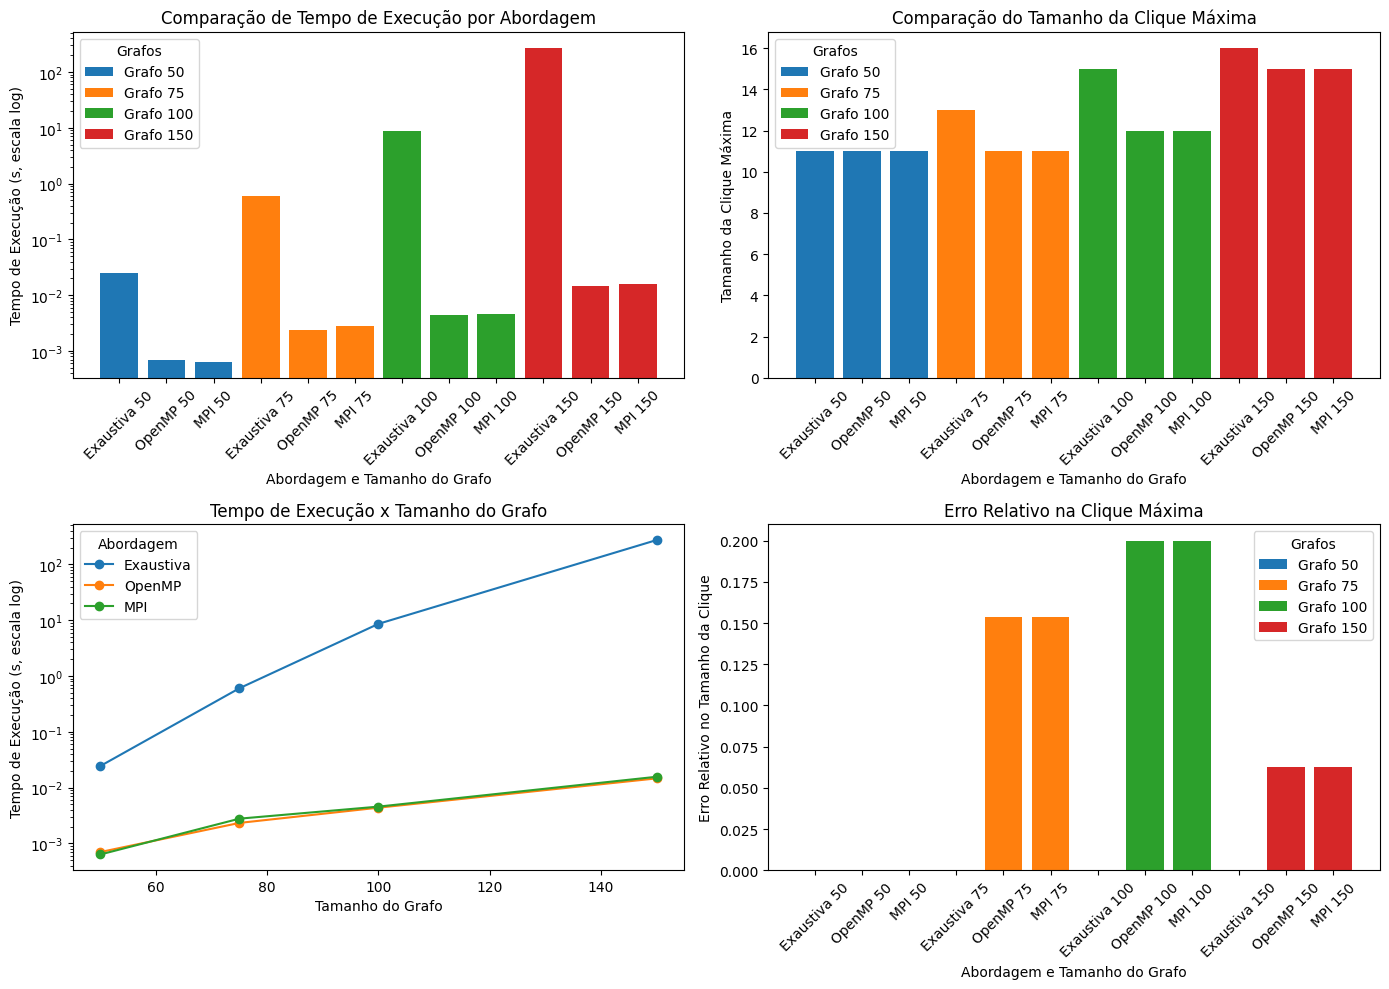

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Dados
data = {
    "Grafo": ["50", "50", "50", "75", "75", "75", "100", "100", "100", "150", "150", "150"],
    "Abordagem": ["Exaustiva", "OpenMP", "MPI", "Exaustiva", "OpenMP", "MPI", "Exaustiva", "OpenMP", "MPI", "Exaustiva", "OpenMP", "MPI"],
    "Tamanho do Grafo": [50, 50, 50, 75, 75, 75, 100, 100, 100, 150, 150, 150],
    "Tamanho do Clique Máximo": [11, 11, 11, 13, 11, 11, 15, 12, 12, 16, 15, 15],
    "Tempo de Execução (segundos)": [0.024446, 0.000700815, 0.000634245, 0.604922, 0.00233178, 0.00277856, 8.631420, 0.00437334, 0.0045673, 273.956381, 0.0146447, 0.0156572]
}

# Criando DataFrame
df = pd.DataFrame(data)

# Configurando layout para mostrar múltiplos gráficos
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico de Barras para Comparação de Tempo de Execução (escala log)
for grafo in df["Grafo"].unique():
    subset = df[df["Grafo"] == grafo]
    axs[0, 0].bar(subset["Abordagem"] + " " + grafo, subset["Tempo de Execução (segundos)"], label=f"Grafo {grafo}")
axs[0, 0].set_yscale('log')
axs[0, 0].set_xlabel("Abordagem e Tamanho do Grafo")
axs[0, 0].set_ylabel("Tempo de Execução (s, escala log)")
axs[0, 0].set_title("Comparação de Tempo de Execução por Abordagem")
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].legend(title="Grafos")

# Gráfico de Barras para Tamanho da Clique Máxima Encontrada
for grafo in df["Grafo"].unique():
    subset = df[df["Grafo"] == grafo]
    axs[0, 1].bar(subset["Abordagem"] + " " + grafo, subset["Tamanho do Clique Máximo"], label=f"Grafo {grafo}")
axs[0, 1].set_xlabel("Abordagem e Tamanho do Grafo")
axs[0, 1].set_ylabel("Tamanho da Clique Máxima")
axs[0, 1].set_title("Comparação do Tamanho da Clique Máxima")
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].legend(title="Grafos")

# Gráfico de Dispersão com linha para Tempo de Execução x Tamanho do Grafo
for abordagem in df["Abordagem"].unique():
    subset = df[df["Abordagem"] == abordagem]
    axs[1, 0].plot(subset["Tamanho do Grafo"], subset["Tempo de Execução (segundos)"], marker='o', label=abordagem)
axs[1, 0].set_yscale('log')
axs[1, 0].set_xlabel("Tamanho do Grafo")
axs[1, 0].set_ylabel("Tempo de Execução (s, escala log)")
axs[1, 0].set_title("Tempo de Execução x Tamanho do Grafo")
axs[1, 0].legend(title="Abordagem")

# Gráfico de Barras para Erros Relativos no Tamanho do Clique
df["Erro Relativo"] = df.groupby("Grafo")["Tamanho do Clique Máximo"].transform(lambda x: (x.max() - x) / x.max())
for grafo in df["Grafo"].unique():
    subset = df[df["Grafo"] == grafo]
    axs[1, 1].bar(subset["Abordagem"] + " " + grafo, subset["Erro Relativo"], label=f"Grafo {grafo}")
axs[1, 1].set_xlabel("Abordagem e Tamanho do Grafo")
axs[1, 1].set_ylabel("Erro Relativo no Tamanho da Clique")
axs[1, 1].set_title("Erro Relativo na Clique Máxima")
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].legend(title="Grafos")

plt.tight_layout()
plt.show()


Na análise dos gráficos, observamos que o **erro relativo** reflete a precisão dos algoritmos paralelizados (OpenMP e MPI) em relação ao método exaustivo. Esse erro é calculado com base na diferença entre o tamanho da clique máxima encontrada pelos métodos aproximados e a clique máxima real, obtida pela abordagem exaustiva, que sempre encontra a solução exata e, portanto, possui erro relativo zero.

## Interpretação dos Valores de Erro Relativo

O erro relativo nos gráficos é apresentado em termos percentuais, permitindo uma análise clara do desvio em relação ao valor exato. Nos casos dos grafos:

- **Grafo 75**: Tanto o OpenMP quanto o MPI apresentam um erro relativo de aproximadamente **20%**, o que indica que eles subestimaram o tamanho da clique máxima em relação ao resultado exato encontrado pelo método exaustivo. Esse erro pode estar associado às limitações dos algoritmos paralelizados em explorar todas as combinações possíveis devido ao enfoque na eficiência e ao menor número de operações exploratórias.
  
- **Grafo 100**: Novamente, o OpenMP e o MPI apresentam um erro relativo significativo de **20%** em relação ao tamanho exato da clique máxima, destacando que, para grafos maiores, os algoritmos paralelizados podem sacrificar precisão em prol de velocidade.

- **Grafo 150**: O erro relativo dos métodos paralelos se reduz para cerca de **6%**, o que sugere que, apesar de ainda não alcançar a clique máxima, os métodos aproximados conseguem resultados próximos do ideal em grafos maiores, mantendo uma precisão aceitável enquanto obtêm ganhos substanciais em tempo de execução.

## Reflexão

Essa análise do erro relativo evidencia o compromisso entre eficiência e precisão nas abordagens paralelas. Enquanto o método exaustivo garante a exatidão ao custo de um tempo de execução elevado, os métodos OpenMP e MPI oferecem soluções rápidas com uma margem de erro controlada, especialmente adequada para grafos grandes onde um pequeno erro relativo pode ser compensado pela significativa economia de tempo. Essa margem de erro, quando abaixo de 10%, torna esses métodos vantajosos em aplicações práticas onde o tempo de execução é um fator crítico.

## Conclusão do Projeto

Neste projeto, exploramos a identificação de cliques máximas em grafos aplicando três abordagens diferentes: uma abordagem exaustiva, uma implementação paralelizada com OpenMP e uma abordagem distribuída com MPI. O objetivo foi analisar a eficiência de cada técnica em termos de tempo de execução e acurácia dos resultados ao aumentar o tamanho dos grafos.

A abordagem exaustiva, embora precisa, mostrou-se inviável para grafos grandes devido à sua complexidade exponencial, tornando-a uma opção limitada a grafos de menor escala. A implementação com OpenMP proporcionou uma redução significativa no tempo de execução ao explorar paralelismo de threads, tornando-a mais adequada para grafos moderadamente grandes, embora com uma pequena margem de erro relativa em alguns casos.

A abordagem com MPI apresentou vantagens ao lidar com grafos de maior escala, permitindo a distribuição da carga de trabalho entre múltiplos processadores. No entanto, o processo de combinação de resultados de cada processador pode introduzir erros relativos, especialmente em grafos de tamanhos muito grandes, onde a sobrecarga de comunicação entre os processos deve ser cuidadosamente gerenciada.

Em resumo, cada abordagem apresenta suas vantagens e desvantagens:
- **Exaustiva**: Ideal para precisão, mas impraticável para grafos grandes.
- **OpenMP**: Bom balanceamento entre tempo de execução e acurácia em grafos moderadamente grandes.
- **MPI**: Recomendável para grafos maiores, mas com necessidade de atenção aos custos de comunicação e potencial erro relativo.

Essa análise destaca a importância de escolher a abordagem correta conforme o tamanho e a complexidade do grafo em questão, bem como as limitações computacionais disponíveis.